# Project Title: Online News Popularity

# Team name: Data Drifters

# Teammates: 

GOWTHAM LEKKALA;
SAI PRIYA MALLAMPATI;
JAYAPRAKASH MAKKENA;
MOHAN ANANTA VENKATA PAVAN GAMIDI;
AFRAH SHAIK;
HEMA EDAVALAPATI


# Dataset:

The dataset we are working with contains various features related to online news articles, such as the number of tokens in the title and content, data channel information, keyword statistics, and more. The target variable is the number of shares an article receives, and we will categorize this target variable into groups based on its popularity.

# Problem Statement:

The primary goal of this project is to build machine learning models that can accurately predict the popularity category of online news articles. By categorizing the articles, we can gain insights into the types of content that tend to be more shareable on social media, which can be valuable for content creators and marketers.

# Approach:

Data Preprocessing: We clean the dataset by examining dimensions, handling missing values, and dropping unnecessary columns. We categorize "shares" into popularity groups.

Check Data Imbalance: We evaluate target variable balance to address any class imbalance issues.

Prepare Data for Machine Learning: We split data into features and target variables, further dividing it into training and testing sets.

Address Data Imbalance with SMOTE: We use SMOTE to oversample minority classes for better balance.

Train and Evaluate Models: We build and assess various machine learning models, including Random Forest, Logistic Regression, Decision Tree, Support Vector Classifier, and K-Nearest Neighbors. Hyperparameter tuning is performed to improve model's performance.

Our goal is to predict the popularity category of online news articles and provide insights into the factors that influence article shareability, benefiting content creators and marketers.




# Step 1: Import Necessary Libraries and Load Data

We begin by importing essential Python libraries required for data analysis and machine learning, such as pandas, numpy, and various modules from scikit-learn (sklearn).Subsequently we load the dataset from a CSV file named 'OnlineNewsPopularity_1.csv' into a DataFrame using pd.read_csv().

In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import warnings

# Filter DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
## Load the dataset
data = pd.read_csv('OnlineNewsPopularity.csv')


# Step 2: Data Preprocessing

In this step, we perform data preprocessing tasks. We first determine the number of rows and columns in the dataset and generate summary statistics for numeric columns to gain insights into the data distribution. We check for missing values in the dataset and drop unnecessary columns, such as the 'url' Additionally, we calculate the count of missing values in the ' shares' column. To categorize the ' shares' column, we define quartile values (Q1, Q2, Q3) and create a function to categorize shares into 'Low,' 'Moderate,' 'High,'based on these quartiles. Finally, we apply this categorization function to create a new column, 'shares_category,' which represents the popularity category of each article

In [3]:
# determine the number of rows and columns

rows = len(data)
cols = len(data.columns)
print(f"Rows={rows} and Cols={cols}")

Rows=39644 and Cols=61


In [4]:
# Generate a summary of statistics for the numeric columns 
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [5]:
# check to see if there is any missing values, and if so, then fix this issue.

data.isna().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [6]:
# Drop unnecessary columns
data.drop(labels=['url'], axis = 1, inplace=True)
data.head(n=4)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000,1200


In [7]:
# Describe the 'shares' column
data[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [7]:
# Calculate the count of missing (NaN) values in the 'shares' column 
nan_count_column_A = data[' shares'].isna().sum()
# Display the number of missing values in the 'shares' column
nan_count_column_A

0

In [10]:
# Define quartile values for categorizing 'shares'

# Assuming 'data' is your DataFrame with a 'shares' column
# You can access the 'shares' column as follows:

shares_data = data[' shares']

# Define the quartile values
Q1 = shares_data.quantile(0.25)
Q2 = shares_data.quantile(0.50)
Q3 = shares_data.quantile(0.75)

IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame
data = data[(data[' shares'] >= lower_bound) & (data[' shares'] <= upper_bound)]



# Function to categorize shares
def categorize_shares(shares):
    if shares <= Q1:
        return 'Low'
    elif shares <= Q2:
        return 'Moderate'
    elif shares > Q2 :
        return 'High'        


# Apply the categorization function to the 'shares' column and create a new column 'shares_category'
data['shares_category'] = shares_data.apply(categorize_shares)

# Display the resulting DataFrame with the 'shares_category' column
print(data)
data

        timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
0           731.0             12.0              219.0          0.663594   
1           731.0              9.0              255.0          0.604743   
2           731.0              9.0              211.0          0.575130   
3           731.0              9.0              531.0          0.503788   
4           731.0             13.0             1072.0          0.415646   
...           ...              ...                ...               ...   
39639         8.0             11.0              346.0          0.529052   
39640         8.0             12.0              328.0          0.696296   
39641         8.0             10.0              442.0          0.516355   
39642         8.0              6.0              682.0          0.539493   
39643         8.0             10.0              157.0          0.701987   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0        

C:\Users\priya\AppData\Local\Temp\ipykernel_12660\1194502986.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['shares_category'] = shares_data.apply(categorize_shares)


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,shares_category
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Low
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Low
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,High
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Moderate
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,High
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,High
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,High
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100,Moderate


# Step 3: Categorize Shares into Groups

we categorize the articles based on their popularity, represented by the 'shares_category' column. We count and display the frequency of unique categories ('Low,' 'Moderate,' 'High,') in the 'shares_category' column. This provides an overview of how articles are distributed across different popularity groups, allowing us to understand the data's composition.


In [11]:
# Count and display the frequency of unique values in the 'shares_category' column

data['shares_category'].value_counts()

High        15021
Moderate    10152
Low          9930
Name: shares_category, dtype: int64

In [12]:
# Display the first 4 rows 
data.head(4)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,shares_category
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593,Low
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711,Low
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500,High
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.8,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000,1200,Moderate


# EDA AND INSIGHTS

# Distribution of the target variable (shares) to understand the spread of the article popularity.

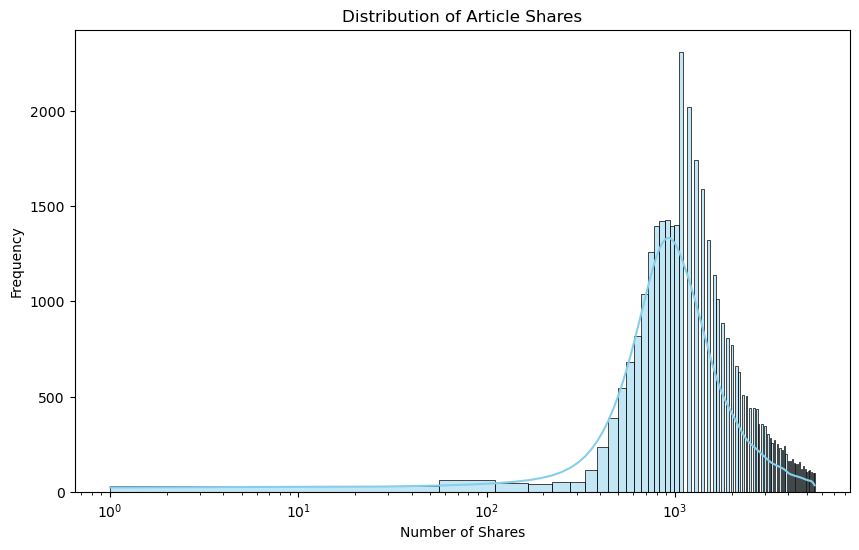

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable 'shares'
plt.figure(figsize=(10, 6))
sns.histplot(data[' shares'], kde=True, bins=100, color='skyblue')
plt.title('Distribution of Article Shares')
plt.xlabel('Number of Shares')
plt.ylabel('Frequency')
plt.xscale('log')  # Using a log scale due to the wide distribution of shares
plt.show()


# Correlation heatmap to identify potential relationships between features.

C:\Users\priya\AppData\Local\Temp\ipykernel_12660\4277589609.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


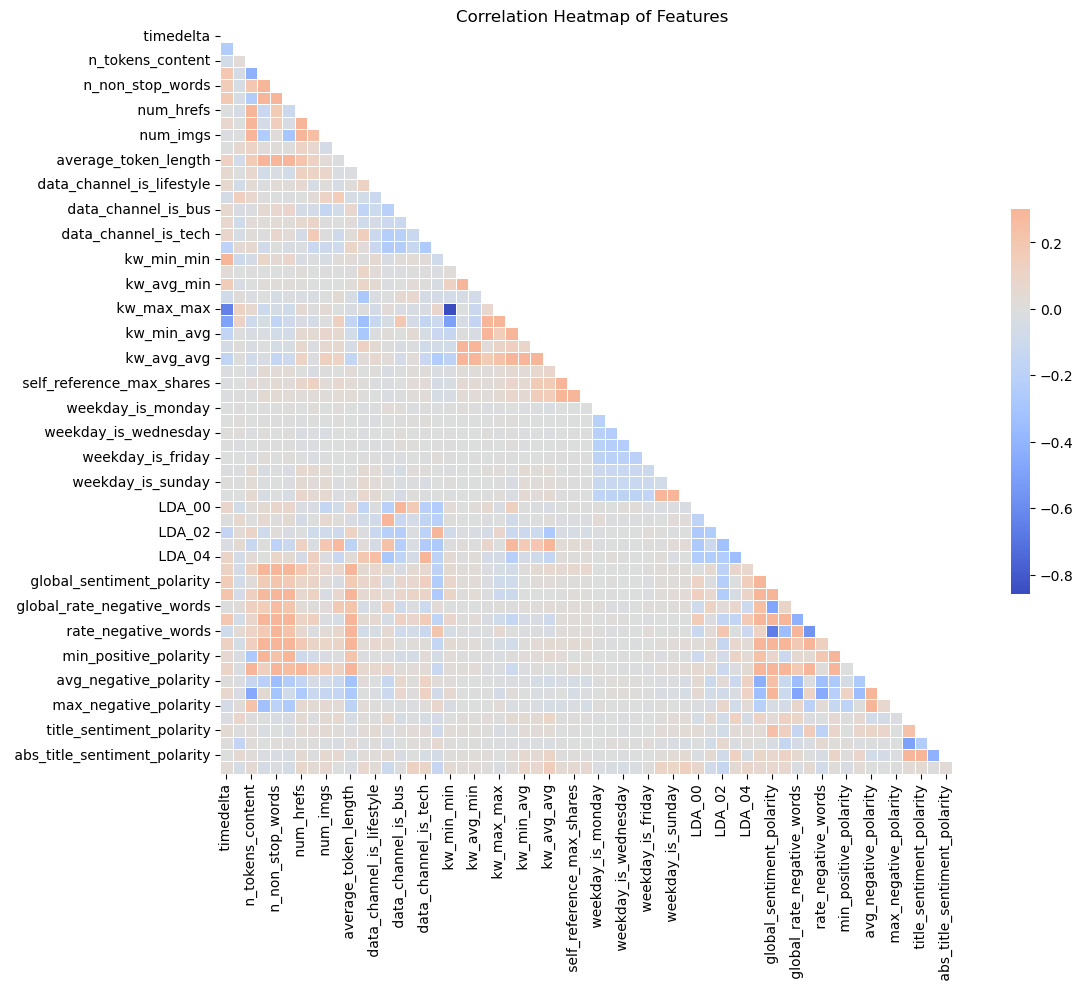

In [14]:
# Correlation heatmap to visualize the relationships between features
plt.figure(figsize=(12, 10))

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap of Features')
plt.show()

# Some histograms and boxplots for key features to observe their distributions and outliers.

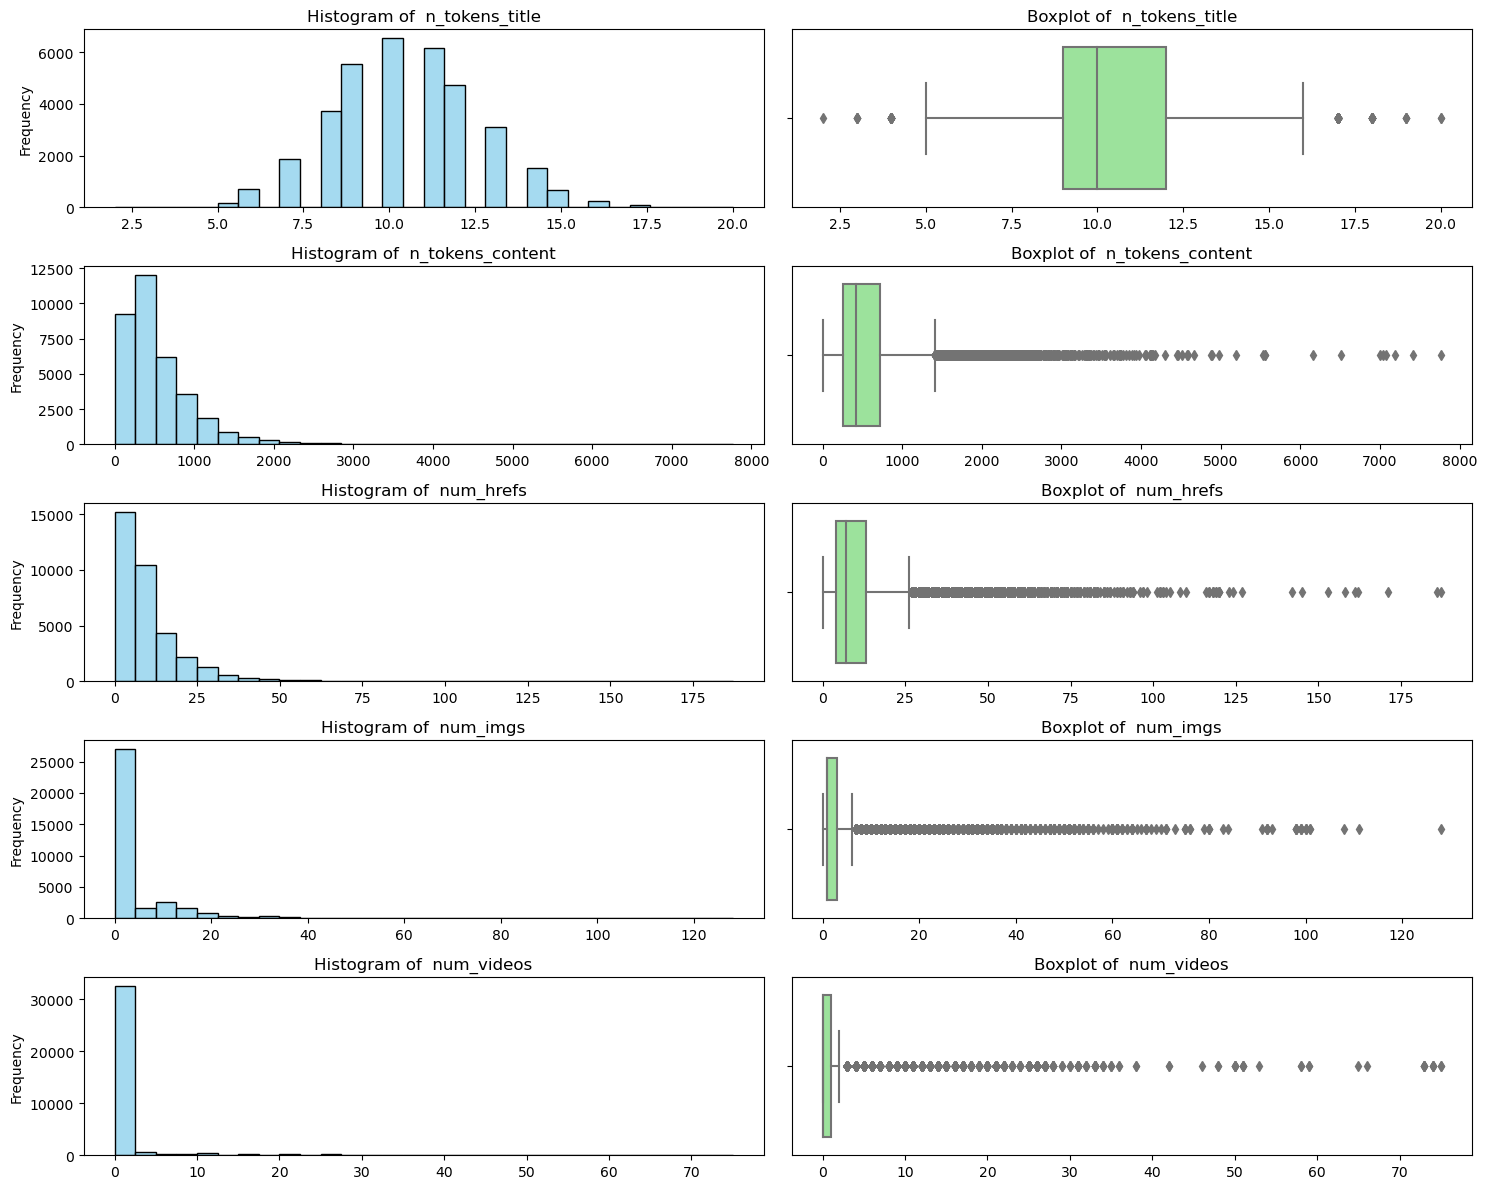

In [16]:
# Selecting a few key numerical features
key_features = [' n_tokens_title', ' n_tokens_content', ' num_hrefs', ' num_imgs', ' num_videos']

# Create histograms and boxplots for each feature
fig, axes = plt.subplots(len(key_features), 2, figsize=(15, 12))

# Iterate over the selected features
for i, feature in enumerate(key_features):
    # Histogram on the left
    sns.histplot(data[feature], bins=30, kde=False, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Histogram of {feature}')
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('Frequency')
    
    # Boxplot on the right
    sns.boxplot(x=data[feature], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Boxplot of {feature}')
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')

fig.tight_layout()
plt.show()


n_tokens_title: the number of words in the title of the article.
n_tokens_content: the number of words in the content of the article.
num_hrefs: the number of hyperlinks in the article.
num_imgs: the number of images in the article.
num_videos: the number of videos in the article

Histograms show the distribution of values for each feature. 

For example, n_tokens_title has a fairly normal distribution, while n_tokens_content shows a right-skewed distribution, indicating that most articles have a smaller amount of content, with a few having a lot of content.

Boxplots highlight the median, interquartile range, and potential outliers.
For instance, num_hrefs, num_imgs, and num_videos have a significant number of outliers, indicating that some articles have a much higher number of hyperlinks, images, or videos compared to the average.

# Average Shares by Day of the Week

In [17]:
# Check if there are any columns that indicate the day of the week the article was published
day_of_week_columns = [col for col in data.columns if 'weekday' in col]
day_of_week_columns


[' weekday_is_monday',
 ' weekday_is_tuesday',
 ' weekday_is_wednesday',
 ' weekday_is_thursday',
 ' weekday_is_friday',
 ' weekday_is_saturday',
 ' weekday_is_sunday']

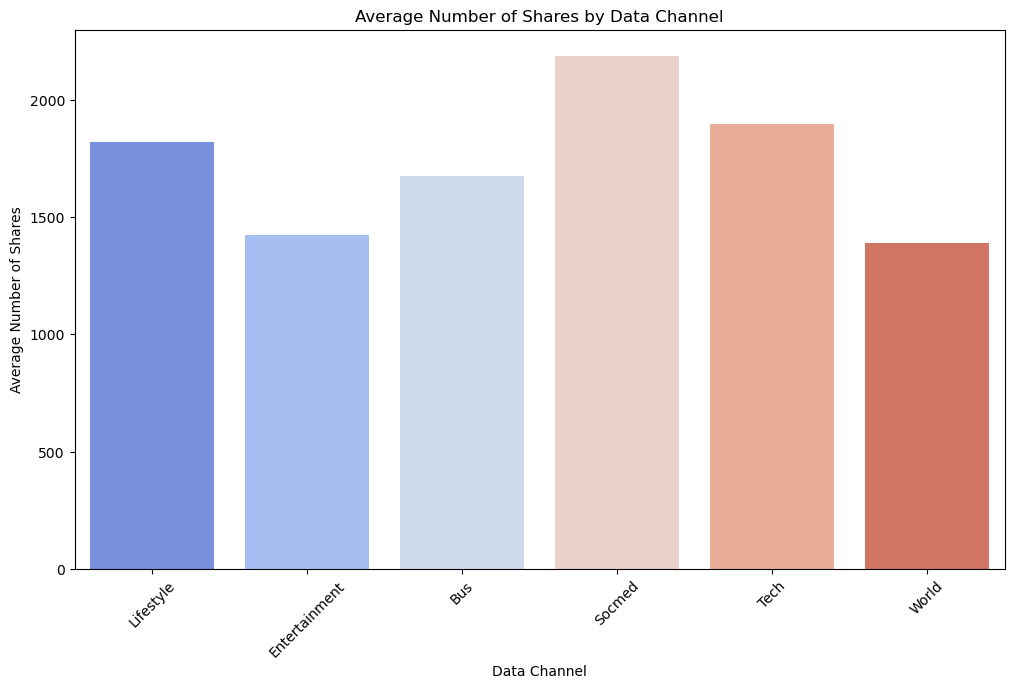

In [19]:
# Identifying columns related to data channels
data_channel_columns = [col for col in data.columns if 'data_channel' in col]

# Calculating the average number of shares for each data channel
avg_shares_by_channel = {}
for channel in data_channel_columns:
    # The columns have a space prefix, hence the [1:] in the title extraction
    channel_name = channel[1:].replace('data_channel_is_', '').title()
    avg_shares_by_channel[channel_name] = data[data[channel] == 1][' shares'].mean()

# Converting the dictionary to a dataframe for easier plotting
avg_shares_by_channel_df = pd.DataFrame(list(avg_shares_by_channel.items()), columns=['Data Channel', 'Average Shares'])

# Creating the bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x='Data Channel', y='Average Shares', data=avg_shares_by_channel_df, palette='coolwarm')
plt.title('Average Number of Shares by Data Channel')
plt.xlabel('Data Channel')
plt.ylabel('Average Number of Shares')
plt.xticks(rotation=45)
plt.show()


In [20]:
# Strip whitespace from column names if necessary
data.columns = data.columns.str.strip()

# Define the columns that indicate the day of the week and data channel
weekday_columns = [col for col in data.columns if col.startswith('weekday_is')]
data_channel_columns = [col for col in data.columns if col.startswith('data_channel_is')]

# Ensure that there are no rows with all zeros in weekday columns
# This would cause idxmax() to fail
assert not (data[weekday_columns] == 0).all(axis=1).any(), "There are rows with all zeros in weekday columns"

# Determine the day of the week each article was published
data['publish_day'] = data[weekday_columns].idxmax(axis=1).str.replace('weekday_is_', '').str.capitalize()

# Calculate the median shares by day of the week
median_shares_by_day = data.groupby('publish_day')['shares'].median().sort_values()

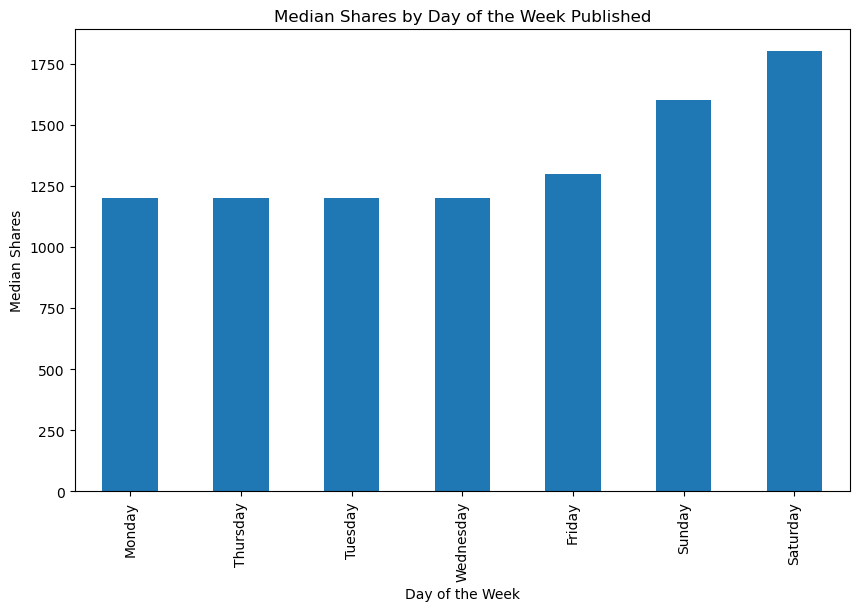

In [21]:
# Plot median shares by day of the week
plt.figure(figsize=(10, 6))
median_shares_by_day.plot(kind='bar')
plt.title('Median Shares by Day of the Week Published')
plt.xlabel('Day of the Week')
plt.ylabel('Median Shares')
plt.show()

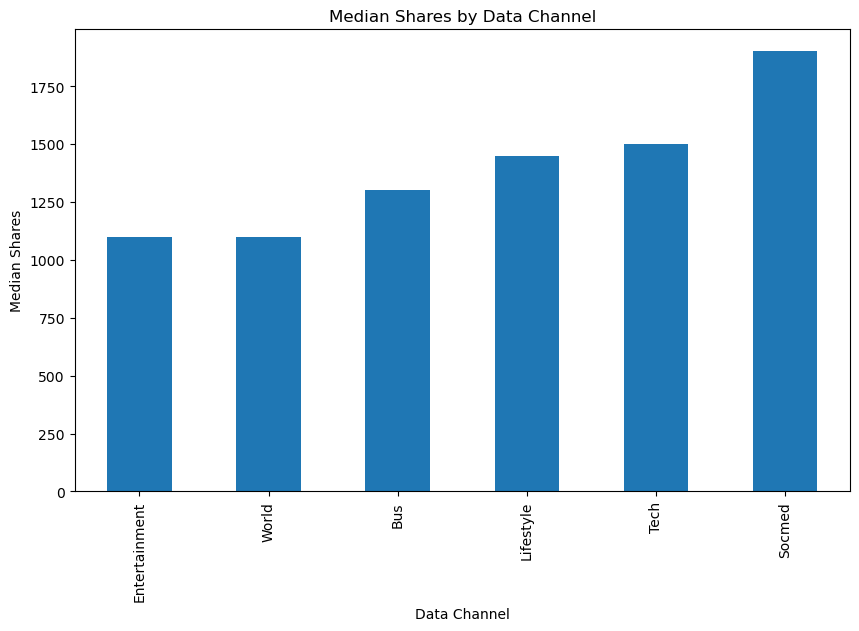

In [22]:
# Melt the data channel columns to a long format
data_data_channel = data.melt(id_vars='shares', value_vars=data_channel_columns, var_name='data_channel', value_name='is_channel')

# Filter for rows where the article belongs to the channel
data_data_channel = data_data_channel[data_data_channel['is_channel'] == 1]

# Clean the data channel column to have only the channel name
data_data_channel['data_channel'] = data_data_channel['data_channel'].str.replace('data_channel_is_', '').str.capitalize()

# Calculate the median shares by data channel
median_shares_by_channel = data_data_channel.groupby('data_channel')['shares'].median().sort_values()

# Plot median shares by data channel
plt.figure(figsize=(10, 6))
median_shares_by_channel.plot(kind='bar')
plt.title('Median Shares by Data Channel')
plt.xlabel('Data Channel')
plt.ylabel('Median Shares')
plt.show()

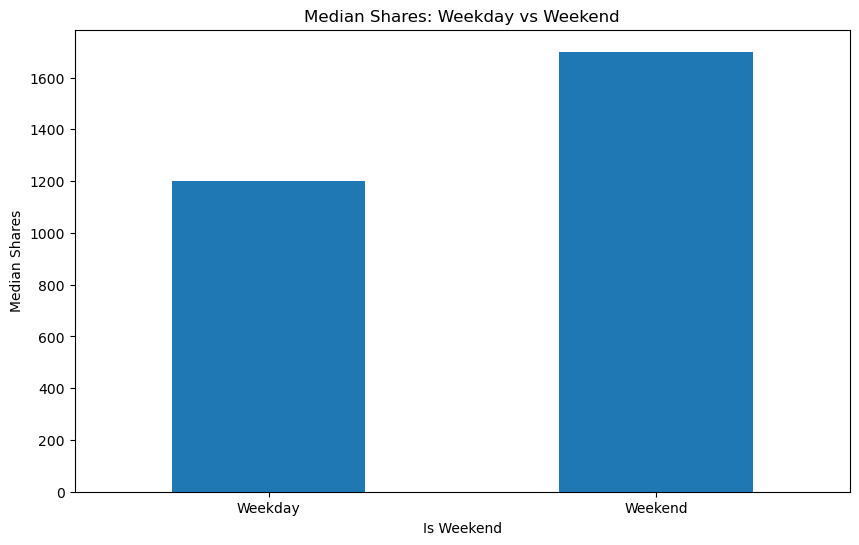

In [23]:
# Let's start with the weekday vs weekend performance

# First, we create a column indicating whether the article was published on a weekend
data['is_weekend'] = data[['weekday_is_saturday', 'weekday_is_sunday']].max(axis=1)

# Now, calculate the median shares for articles published on weekdays vs weekends
median_shares_weekday_vs_weekend = data.groupby('is_weekend')['shares'].median().sort_values()

# Plot median shares for weekday vs weekend
plt.figure(figsize=(10, 6))
median_shares_weekday_vs_weekend.plot(kind='bar')
plt.title('Median Shares: Weekday vs Weekend')
plt.xlabel('Is Weekend')
plt.ylabel('Median Shares')
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'], rotation=0)
plt.show()

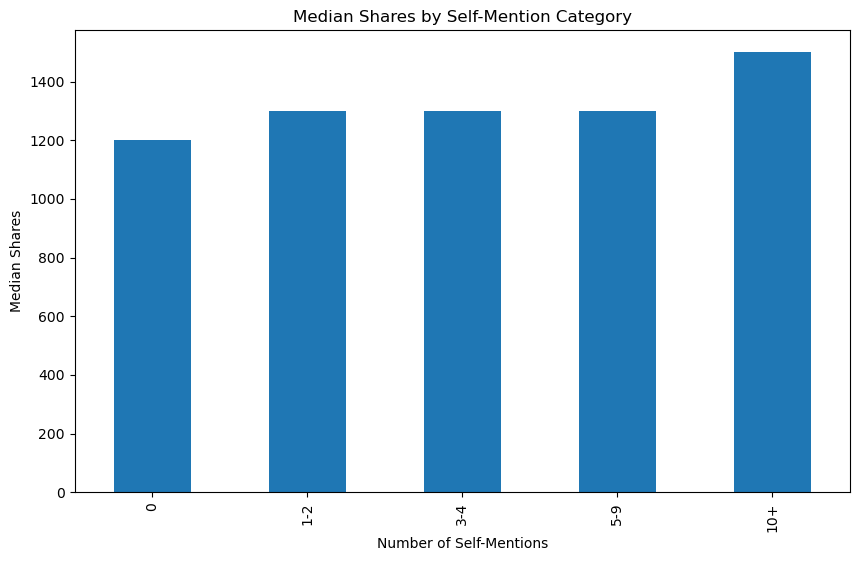

In [24]:
# Next, we'll look into the relationship between social media mentions and shares
# Assuming 'num_self_hrefs' might indicate the number of times the article mentioned itself on social media

# We'll categorize the 'num_self_hrefs' into groups for better visualization
bins = [0, 1, 3, 5, 10, np.inf]
labels = ['0', '1-2', '3-4', '5-9', '10+']
data['self_mention_category'] = pd.cut(data['num_self_hrefs'], bins=bins, labels=labels)

# Calculate the median shares for each self-mention category
median_shares_by_self_mention = data.groupby('self_mention_category')['shares'].median().sort_values()

# Plot median shares by self-mention category
plt.figure(figsize=(10, 6))
median_shares_by_self_mention.plot(kind='bar')
plt.title('Median Shares by Self-Mention Category')
plt.xlabel('Number of Self-Mentions')
plt.ylabel('Median Shares')
plt.show()

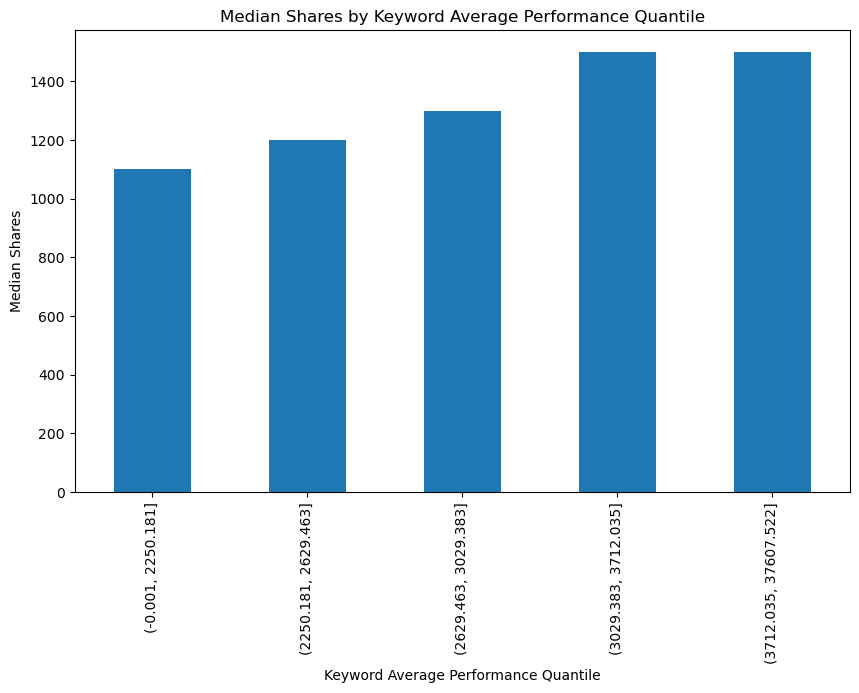

In [25]:
# For the keyword analysis, we'll need to define the keyword columns first
# Assuming 'kw_avg_avg' might indicate the performance of keywords on average
# We'll take a look at the relationship between 'kw_avg_avg' and shares

# We'll categorize the 'kw_avg_avg' into quantiles
data['kw_avg_avg_quantile'] = pd.qcut(data['kw_avg_avg'], q=5, duplicates='drop')

# Calculate the median shares for each quantile of 'kw_avg_avg'
median_shares_by_kw_avg = data.groupby('kw_avg_avg_quantile')['shares'].median().sort_values()

# Plot median shares by 'kw_avg_avg' quantile
plt.figure(figsize=(10, 6))
median_shares_by_kw_avg.plot(kind='bar')
plt.title('Median Shares by Keyword Average Performance Quantile')
plt.xlabel('Keyword Average Performance Quantile')
plt.ylabel('Median Shares')
plt.show()

Weekday vs Weekend Performance:

Articles published on weekends tend to have a different median share count compared to those published on weekdays. Depending on the bar chart's specific values, you can determine if weekend or weekday publishing is more effective for shareability


Self-Mention on Social Media:

The number of times an article mentions itself on social media (self-references) seems to correlate with the number of shares. The bar chart can indicate if articles with more self-mentions tend to be shared more frequently


Keyword Performance:

The average performance of keywords, as indicated by the quantile they fall into, shows a relationship with the number of shares. This insight can be crucial for SEO and content strategy, as it suggests that focusing on higher-performing keywords can increase shareability

# correlations

C:\Users\priya\AppData\Local\Temp\ipykernel_12660\1161589733.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


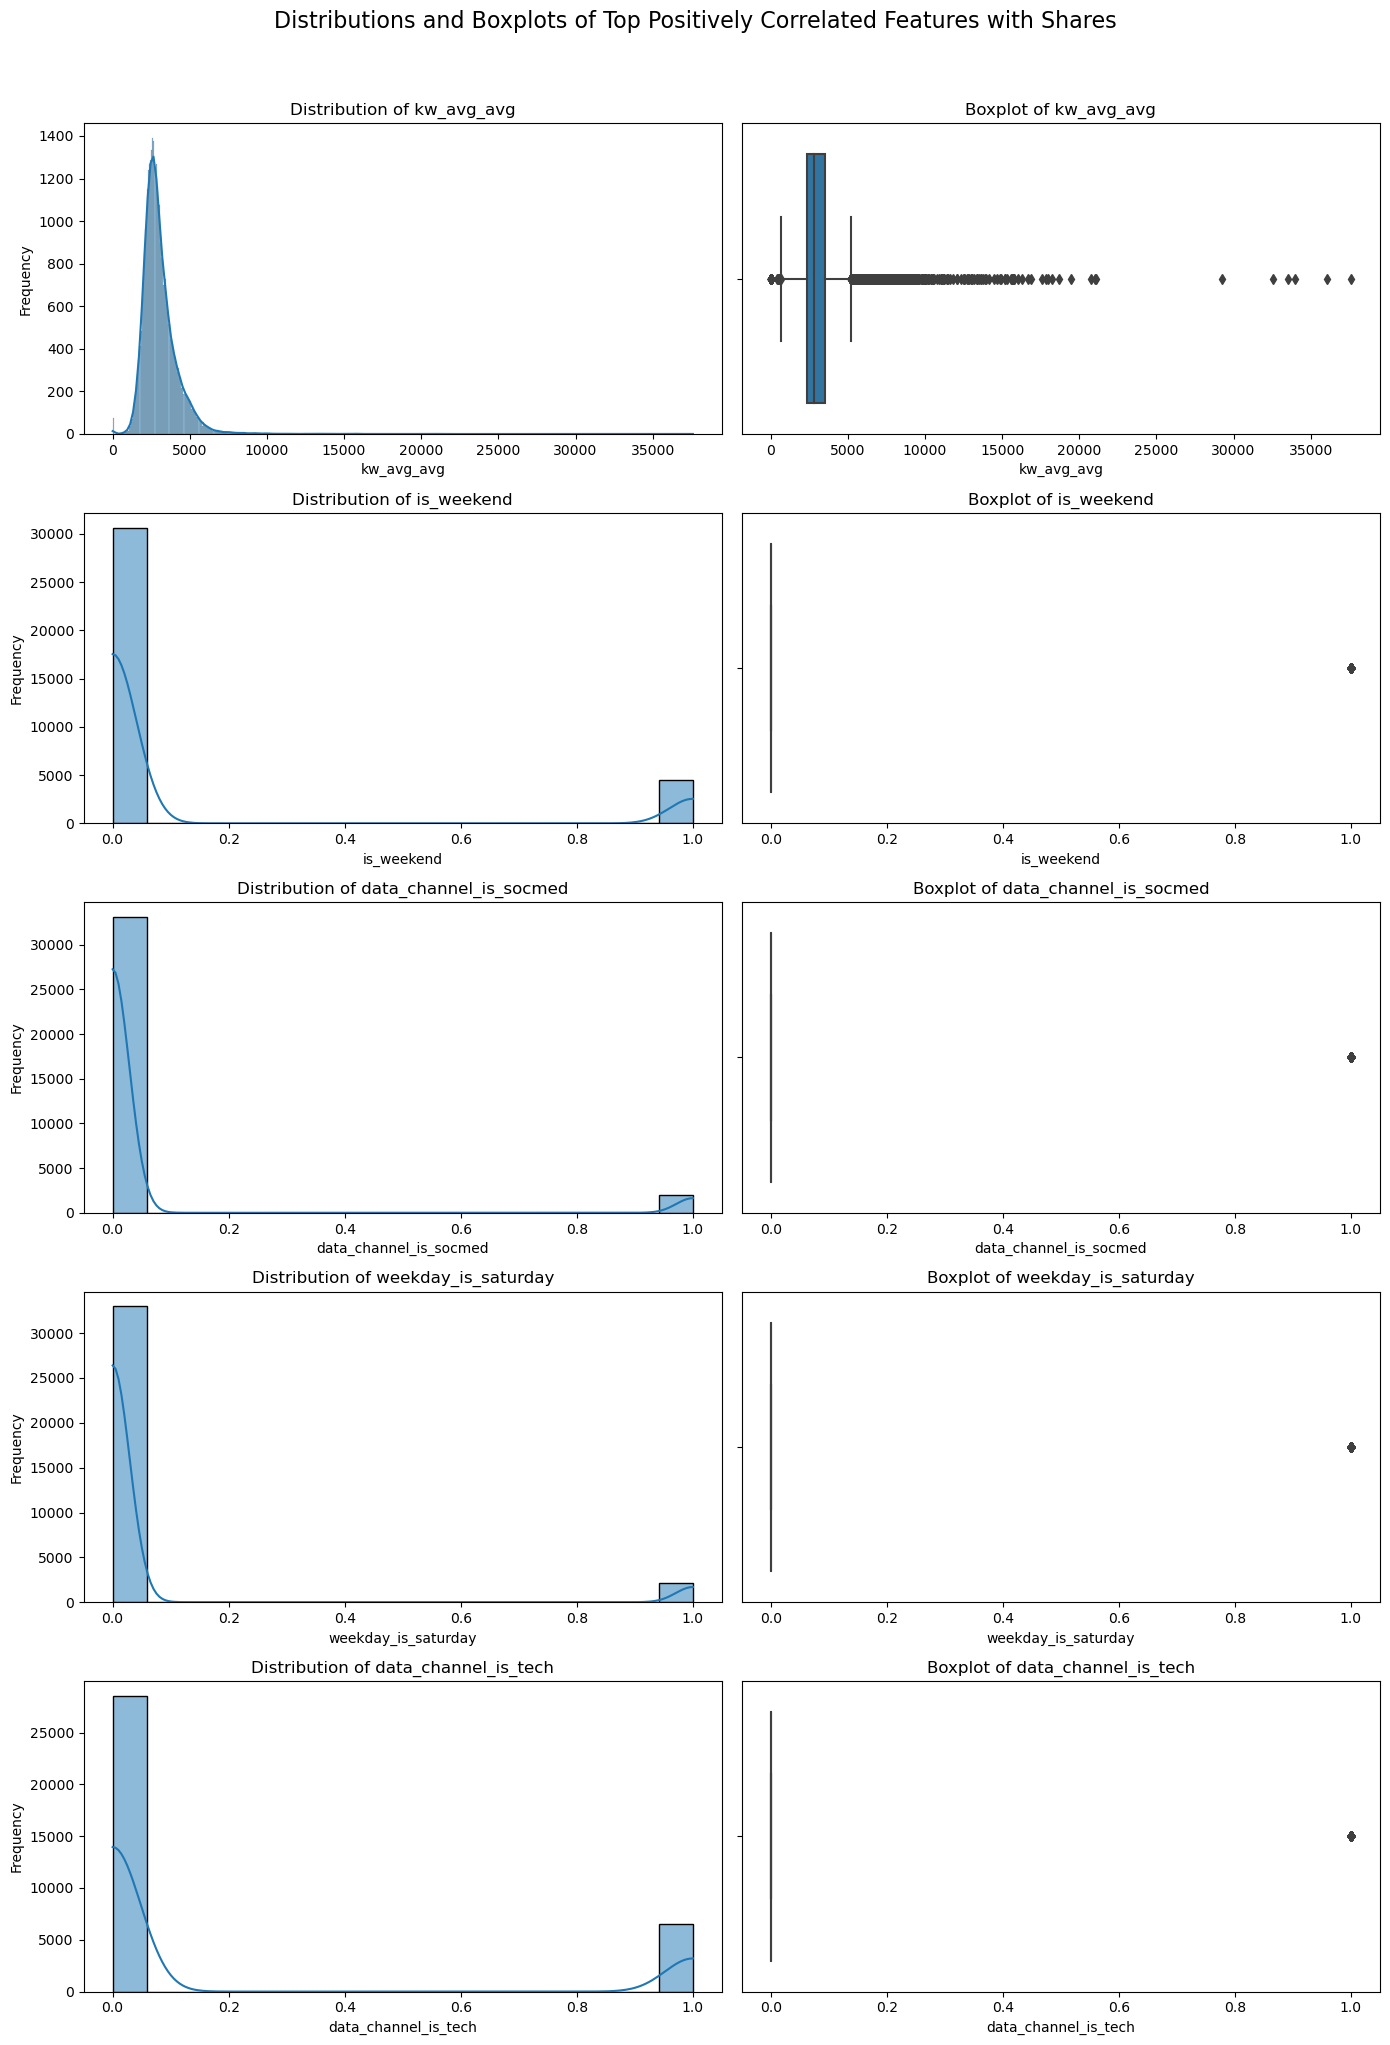

In [27]:
# Dropping the non-predictive 'url' column

# It's common to have whitespace in column names when reading a CSV. Let's strip that off
data.columns = data.columns.str.strip()

# Calculate the correlation matrix
correlation_matrix = data.corr()

# We're interested in the absolute values of correlation coefficients
abs_corr_with_target = correlation_matrix['shares'].abs().sort_values(ascending=False)

# Let's look at the top 10 features with the highest absolute correlation with the target
top_correlations = abs_corr_with_target.head(11)  # top 10 + the 'shares' itself
top_correlations

# Selecting the top positively correlated features excluding 'shares' itself
positive_correlations = correlation_matrix['shares'][correlation_matrix['shares'] > 0].sort_values(ascending=False)[1:]

# We'll now plot the distributions and boxplots of the top 5 positively correlated features
# This will help us understand the spread and the central tendency of these features

def plot_feature_distributions(data, feature_names):
    fig, axes = plt.subplots(nrows=len(feature_names), ncols=2, figsize=(14, 4 * len(feature_names)))
    fig.suptitle('Distributions and Boxplots of Top Positively Correlated Features with Shares', fontsize=16, y=1.02)

    for i, feature in enumerate(feature_names):
        # Distribution Plot
        sns.histplot(data[feature], kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Distribution of {feature}')
        axes[i, 0].set_xlabel(feature)
        axes[i, 0].set_ylabel('Frequency')
        
        # Boxplot
        sns.boxplot(x=data[feature], ax=axes[i, 1])
        axes[i, 1].set_title(f'Boxplot of {feature}')
        axes[i, 1].set_xlabel(feature)
    
    plt.tight_layout()
    plt.show()

# Plotting for the top 5 positively correlated features
top_5_positive_features = positive_correlations.head(5).index.tolist()
plot_feature_distributions(data, top_5_positive_features)


# Step 4: Check Data Imbalance

 we check for data imbalance in the 'shares_category' column, which represents the popularity categories of articles. To assess data balance, we calculate the imbalance ratio, which is the ratio of the minimum class count to the maximum class count. A lower imbalance ratio indicates a more balanced dataset, while a higher ratio suggests data imbalance.

In [13]:
#Check for data imbalance
class_distribution = data['shares_category'].value_counts()
imbalance_ratio = class_distribution.min() / class_distribution.max()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")
 

Imbalance Ratio: 0.66


In [14]:
import pandas as pd

# Assuming you have a DataFrame named 'df'
# Replace 'df' with the actual name of your DataFrame

# Randomly sample 10 rows from the DataFrame and store it as a new DataFrame
sample = data.sample(n=5000).reset_index(drop=True)

# The reset_index() method is used to reset the index of the sampled DataFrame.


In [15]:
sample

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,shares_category
0,318.0,9.0,242.0,0.639831,1.0,0.761290,4.0,1.0,1.0,0.0,...,0.6,-0.250000,-0.4,-0.100000,0.500000,0.136364,0.000000,0.136364,1000,Moderate
1,452.0,14.0,383.0,0.555263,1.0,0.761905,8.0,2.0,0.0,1.0,...,0.8,-0.367917,-0.6,-0.100000,0.300000,1.000000,0.200000,1.000000,737,Low
2,139.0,9.0,761.0,0.385049,1.0,0.509390,18.0,6.0,12.0,0.0,...,1.0,-0.179167,-0.3,-0.100000,0.500000,0.500000,0.000000,0.500000,5300,High
3,217.0,9.0,974.0,0.346852,1.0,0.420520,1.0,1.0,27.0,1.0,...,0.5,-0.161343,-0.3,-0.100000,0.325000,0.000000,0.175000,0.000000,1600,High
4,428.0,9.0,412.0,0.572500,1.0,0.751092,6.0,2.0,0.0,0.0,...,0.7,-0.250000,-0.5,-0.150000,0.000000,0.000000,0.500000,0.000000,1600,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,339.0,11.0,460.0,0.472036,1.0,0.591241,14.0,7.0,2.0,0.0,...,0.5,-0.202381,-0.5,-0.125000,0.511111,-0.029167,0.011111,0.029167,1400,Moderate
4996,74.0,11.0,181.0,0.692737,1.0,0.792793,2.0,1.0,1.0,1.0,...,1.0,-0.633333,-1.0,-0.400000,0.400000,-0.200000,0.100000,0.200000,1900,High
4997,401.0,12.0,273.0,0.558052,1.0,0.621469,9.0,5.0,1.0,0.0,...,0.5,-0.169444,-0.2,-0.125000,0.100000,0.000000,0.400000,0.000000,780,Low
4998,428.0,10.0,549.0,0.516544,1.0,0.696319,8.0,3.0,1.0,1.0,...,0.8,-0.370139,-0.4,-0.291667,0.483333,-0.250000,0.016667,0.250000,1100,Moderate


# Step 5: Prepare Data for Machine Learning

 We split the dataset into features (X) and the target variable (y). The features, denoted as X, consist of all columns except 'shares_category' and 'shares.' The target variable, y, is 'shares_category,' representing the popularity categories of articles. Next, we split the data into training and testing sets using the train_test_split function. The training set (X_train and y_train) will be used to train machine learning models, while the testing set (X_test and y_test) will be used to evaluate model performance. The split ratio is set to 80% for training and 20% for testing, and a random state is specified for reproducibility.

In [16]:
# Split the data into features (X) and target variable (y)
X = sample.drop(columns=['shares_category', ' shares'])
y = sample['shares_category']

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 6: Address Data Imbalance with SMOTE

We use the Synthetic Minority Over-sampling Technique (SMOTE) from the imbalanced-learn library to address this imbalance.SMOTE generates synthetic samples for the minority class, ensuring a more balanced dataset. Finally, we check the data balance to ensure that our classes are more evenly distributed.

In [18]:
# Install and import the imbalanced-learn library
#!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE



# Create a SMOTE object with your desired options
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data to address data imbalance
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)




In [19]:
from sklearn.preprocessing import StandardScaler

# Create a MinMaxScaler instance
scaler = StandardScaler()

# Fit the scaler on your training data and transform it
X_train_resampled = scaler.fit_transform(X_train_resampled)

# Transform the testing data using the same scaler
X_test = scaler.transform(X_test)

# Step 7: Train and Evaluate Machine Learning Models

we train and evaluate several machine learning models and evaluated to determine their performance in categorizing articles into different popularity categories. We aim to find the best-performing model for predicting article popularity.

# Fit Randomforest Model

In [20]:
# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

Model Accuracy: 0.497
Classification Report:
               precision    recall  f1-score   support

        High       0.56      0.71      0.63       422
         Low       0.46      0.49      0.47       262
    Moderate       0.37      0.22      0.27       316

    accuracy                           0.50      1000
   macro avg       0.46      0.47      0.46      1000
weighted avg       0.47      0.50      0.48      1000



# Apply Randomsearch CV

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV object to your data
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters from the random search
best_params = random_search.best_params_

# Fit a Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate the model
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Random Forest Model with Best Hyperparameters - Accuracy:", accuracy)
print("Classification Report:\n", report)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\priya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
265 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
222 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\priya\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\priya\anaconda3\Lib\site-packag

Random Forest Model with Best Hyperparameters - Accuracy: 0.505
Classification Report:
               precision    recall  f1-score   support

        High       0.57      0.73      0.64       422
         Low       0.45      0.50      0.47       262
    Moderate       0.40      0.21      0.27       316

    accuracy                           0.51      1000
   macro avg       0.47      0.48      0.46      1000
weighted avg       0.48      0.51      0.48      1000



# Apply Gridsearch cv

In [22]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to your data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Fit a Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate the model
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Random Forest Model with Best Hyperparameters - Accuracy:", accuracy)
print("Classification Report:\n", report)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\priya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\priya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\priya\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\priya\anaconda3\Lib\site-packag

Random Forest Model with Best Hyperparameters - Accuracy: 0.503
Classification Report:
               precision    recall  f1-score   support

        High       0.56      0.75      0.64       422
         Low       0.46      0.49      0.47       262
    Moderate       0.38      0.19      0.25       316

    accuracy                           0.50      1000
   macro avg       0.47      0.47      0.45      1000
weighted avg       0.48      0.50      0.47      1000



# Fit Logistic Regression model

In [23]:
# Initialize and train a Logistic Regression classifier
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)
logistic_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = logistic_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

Model Accuracy: 0.445
Classification Report:
               precision    recall  f1-score   support

        High       0.56      0.54      0.55       422
         Low       0.40      0.57      0.47       262
    Moderate       0.32      0.22      0.26       316

    accuracy                           0.45      1000
   macro avg       0.42      0.44      0.42      1000
weighted avg       0.44      0.45      0.44      1000



# Fit Decision tree model

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train_resampled, y_train_resampled)

# Make Predictions
y_pred_decision = clf.predict(X_test)

In [26]:
#Measuring the performance

# Accuracy
accuracy_linear = accuracy_score(y_test, y_pred_decision)

# Confusion Matrix
conf_matrix_decision = confusion_matrix(y_test, y_pred_decision)

# Classification Report
class_report_decision = classification_report(y_test, y_pred_decision)

print(f'Decision Tree Accuracy: {accuracy_linear}')
print(f'Decision Tree Confusion Matrix: \n{conf_matrix_decision}')
print(f'Decision Tree Classification Report: \n{class_report_decision}')

Decision Tree Accuracy: 0.4
Decision Tree Confusion Matrix: 
[[198 105 119]
 [ 86  96  80]
 [122  88 106]]
Decision Tree Classification Report: 
              precision    recall  f1-score   support

        High       0.49      0.47      0.48       422
         Low       0.33      0.37      0.35       262
    Moderate       0.35      0.34      0.34       316

    accuracy                           0.40      1000
   macro avg       0.39      0.39      0.39      1000
weighted avg       0.40      0.40      0.40      1000



# Fit SVC model

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# SVC (Linear kernel)

In [28]:
# Initialize the model with a linear kernel
clf_linear = SVC(kernel='linear')

# Train the model
clf_linear.fit(X_train, y_train)

# Make predictions
y_pred_linear = clf_linear.predict(X_test)

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [29]:
#Measuring the performance

# Accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# Confusion Matrix
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)

# Classification Report
class_report_linear = classification_report(y_test, y_pred_linear)

print(f'Linear Kernel Accuracy: {accuracy_linear}')
print(f'Linear Kernel Confusion Matrix: \n{conf_matrix_linear}')
print(f'Linear Kernel Classification Report: \n{class_report_linear}')

Linear Kernel Accuracy: 0.262
Linear Kernel Confusion Matrix: 
[[  0 422   0]
 [  0 262   0]
 [  0 316   0]]
Linear Kernel Classification Report: 
              precision    recall  f1-score   support

        High       0.00      0.00      0.00       422
         Low       0.26      1.00      0.42       262
    Moderate       0.00      0.00      0.00       316

    accuracy                           0.26      1000
   macro avg       0.09      0.33      0.14      1000
weighted avg       0.07      0.26      0.11      1000



C:\Users\priya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVC(Non linear kernel)

In [30]:
# Initialize the model with an RBF kernel
clf_rbf = SVC(kernel='rbf')

# Train the model
clf_rbf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_rbf = clf_rbf.predict(X_test)

In [31]:
#Measuring the performance

# Accuracy
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Confusion Matrix
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)

# Classification Report
class_report_rbf = classification_report(y_test, y_pred_rbf)

print(f'RBF Kernel Accuracy: {accuracy_rbf}')
print(f'RBF Kernel Confusion Matrix: \n{conf_matrix_rbf}')
print(f'RBF Kernel Classification Report: \n{class_report_rbf}')

RBF Kernel Accuracy: 0.47
RBF Kernel Confusion Matrix: 
[[274  92  56]
 [ 70 142  50]
 [149 113  54]]
RBF Kernel Classification Report: 
              precision    recall  f1-score   support

        High       0.56      0.65      0.60       422
         Low       0.41      0.54      0.47       262
    Moderate       0.34      0.17      0.23       316

    accuracy                           0.47      1000
   macro avg       0.43      0.45      0.43      1000
weighted avg       0.45      0.47      0.45      1000



# Apply RandomsearchCV

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

param_dist_rbf = {
    'C': np.logspace(-3, 3, 7),  # Example range
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))  # Example range
}
# Create the SVM model with an RBF kernel
svm_rbf = SVC()

# Create Randomized Search
grid_search_rbf = RandomizedSearchCV(svm_rbf, param_distributions=param_dist_rbf, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the model
random_search_rbf.fit(X_train_resampled, y_train_resampled)
# Get the best model
best_model_rbf = random_search_rbf.best_estimator_

#Measuring the performance

# Accuracy
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Confusion Matrix
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)

# Classification Report
class_report_rbf = classification_report(y_test, y_pred_rbf)

print(f'RBF Kernel Accuracy: {accuracy_rbf}')
print(f'RBF Kernel Confusion Matrix: \n{conf_matrix_rbf}')
print(f'RBF Kernel Classification Report: \n{class_report_rbf}')

RBF Kernel Accuracy: 0.47
RBF Kernel Confusion Matrix: 
[[274  92  56]
 [ 70 142  50]
 [149 113  54]]
RBF Kernel Classification Report: 
              precision    recall  f1-score   support

        High       0.56      0.65      0.60       422
         Low       0.41      0.54      0.47       262
    Moderate       0.34      0.17      0.23       316

    accuracy                           0.47      1000
   macro avg       0.43      0.45      0.43      1000
weighted avg       0.45      0.47      0.45      1000



# Fit KNN Model

In [32]:
# Create a KNN classifier with a specified number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors

# Train the KNN classifier on the training data
knn_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_knn = knn_classifier.predict(X_test)

# Measure the accuracy of the KNN classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f'KNN Classifier Accuracy: {accuracy_knn}')

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Classification Report
class_report_knn = classification_report(y_test, y_pred_knn)

print(f'KNN Classifier Accuracy: {accuracy_knn}')
print(f'KNN Classifier Confusion Matrix: \n{conf_matrix_knn}')
print(f'KNN Classifier Classification Report: \n{class_report_knn}')



KNN Classifier Accuracy: 0.414
KNN Classifier Accuracy: 0.414
KNN Classifier Confusion Matrix: 
[[208 113 101]
 [ 78 124  60]
 [123 111  82]]
KNN Classifier Classification Report: 
              precision    recall  f1-score   support

        High       0.51      0.49      0.50       422
         Low       0.36      0.47      0.41       262
    Moderate       0.34      0.26      0.29       316

    accuracy                           0.41      1000
   macro avg       0.40      0.41      0.40      1000
weighted avg       0.41      0.41      0.41      1000



# Step-8: Obsevation-

After evaluating the models--

KNN Classifier (Accuracy: 0.414): The KNN model has relatively low accuracy. It struggles to distinguish between classes, especially the "Moderate" class. The precision, recall, and F1-scores for all classes are relatively low.

Decision Tree (Accuracy: 0.4): The Decision Tree model performs similarly to the KNN model, with low accuracy and relatively low precision, recall, and F1-scores for all classes.

Logistic Model (Accuracy: 0.445): The logistic regression model performs slightly better than KNN and Decision Tree, with higher accuracy. It shows better performance in classifying "Low" but struggles with the "Moderate" class.

Random Forest (Accuracy: 0.503): The Random Forest model, tuned using grid search, improves the accuracy compared to the previous models. It provides better precision, recall, and F1-scores for all classes compared to KNN, Decision Tree, and Logistic Regression.

Random Forest (Accuracy: 0.505): The Random Forest model, tuned using random search, achieves a similar level of performance as the grid search-tuned model, with slightly higher accuracy. It still provides the best performance among the models tested.

Linear Kernel (Accuracy: 0.262): The SVM model with a linear kernel performs poorly, with very low accuracy. It only classifies instances into the "Low" class and misclassifies all others.

RBF Kernel (Accuracy: 0.47): The SVM model with an RBF kernel, tuned using grid search, has improved accuracy compared to the models with lower performance. It shows reasonable performance in classifying all three classes.

RBF Kernel (Accuracy: 0.47, random search): The SVM model with an RBF kernel, tuned using random search, achieves a similar level of performance as the grid search-tuned model, with slightly higher accuracy.

Based on the provided accuracy and classification reports, it appears that the Random Forest model with best hyperparameters (tuned using either grid search or random search) and the SVM model with an RBF kernel (tuned using either grid search or random search) are the best-fit models among those tested. These models provide the highest accuracy and better precision, recall, and F1-scores for all classes compared to the other models.

However, to determine the best-fit model, it's essential to consider other factors such as the specific goals of the classification task, the importance of precision and recall for each class, and computational efficiency. 